In [ ]:
# Hotel review Textmining

In [1]:
import numpy as np 
import pandas as pd 
import string
import spacy

In [2]:
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("C:\\Users\\amind\\Downloads\\La_Veranda_Reviews-2023-01-16.csv")
data

,Title,PositiveReview,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse
0,Wonderful place to stay.,"New, comfortable apartments, close to the airp...",Nothing at all.,10.0,Olga,Norway,Budget Twin Room,1 night,June 2022,Solo traveler,NaN
1,It was superb,We had a really pleasant stay! The staff was v...,NaN,10.0,Iwona,Poland,Double Room,3 nights,December 2022,Family,NaN
2,Very Good,the location is great and near the airport. bu...,NaN,8.0,Ruijia,Sweden,Double Room,1 night,December 2022,Solo traveler,NaN
3,Wonderful,Great stuff\nGreat Quality/price\nClean,NaN,9.0,Theprincem,United Kingdom,Double Room with Balcony,2 nights,September 2022,Solo traveler,NaN
4,"Fantastic value for a new, modern and spotless...","Clean and modern with very comfortable beds, i...",NaN,10.0,M,Switzerland,Family Suite with Balcony,1 night,October 2022,Family,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1518,Exceptional,NaN,NaN,10.0,Anonymous,Israel,NaN,5 nights,September 2021,Couple,NaN
1519,Wonderful,NaN,NaN,9.0,Anonymous,Czech Republic,NaN,1 night,September 2021,Group,NaN
1520,Very Good,NaN,NaN,8.0,Anonymous,Sweden,NaN,1 night,August 2021,Couple,NaN
1521,Wonderful,NaN,NaN,9.0,Anonymous,Germany,NaN,3 nights,September 2021,Solo traveler,NaN


In [5]:
len(data)

1523

In [6]:
data.describe()

,Score
count,1523.000000
mean,8.973802
std,1.300178
min,1.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,10.000000


In [7]:
data.columns

Index(['Title', 'PositiveReview', 'NegativeReview', 'Score', 'GuestName',
       'GuestCountry', 'RoomType', 'NumberOfNights', 'VisitDate', 'GroupType',
       'PropertyResponse'],
      dtype='object')

In [8]:
# Checking for NA values
data.isna().sum()

Title                  2
PositiveReview       748
NegativeReview      1088
Score                  0
GuestName              0
GuestCountry           0
RoomType              63
NumberOfNights         0
VisitDate              0
GroupType              0
PropertyResponse    1400
dtype: int64

In [10]:
data['PositiveReview'] = data['PositiveReview'].fillna('Missing')

In [13]:
# Concatinating review_text and summary
data['reviews'] = data['PositiveReview'] + data['Title']

# Dropping review_text and summary

data = data.drop(['PositiveReview', 'Title'], axis = 1)

data.head()

,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse,reviews
0,Nothing at all.,10.0,Olga,Norway,Budget Twin Room,1 night,June 2022,Solo traveler,NaN,"New, comfortable apartments, close to the airp..."
1,NaN,10.0,Iwona,Poland,Double Room,3 nights,December 2022,Family,NaN,We had a really pleasant stay! The staff was v...
2,NaN,8.0,Ruijia,Sweden,Double Room,1 night,December 2022,Solo traveler,NaN,the location is great and near the airport. bu...
3,NaN,9.0,Theprincem,United Kingdom,Double Room with Balcony,2 nights,September 2022,Solo traveler,NaN,Great stuff\nGreat Quality/price\nCleanWonderful
4,NaN,10.0,M,Switzerland,Family Suite with Balcony,1 night,October 2022,Family,NaN,"Clean and modern with very comfortable beds, i..."


In [14]:
data[data.duplicated()]

,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse,reviews


In [15]:
data=data.drop_duplicates()

In [16]:
data.isnull().sum()

NegativeReview      1088
Score                  0
GuestName              0
GuestCountry           0
RoomType              63
NumberOfNights         0
VisitDate              0
GroupType              0
PropertyResponse    1400
reviews                2
dtype: int64

In [17]:
data=data.dropna()

In [18]:
data

,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse,reviews
25,Leaving..in fact just re booked the hotel for ...,10.0,J,Thailand,Double Room with Balcony,1 night,November 2022,Family,"Thank you very much for your nice words, we re...",The hotel is 5 minutes from the beach and the ...
74,Disappointed we didn't have a balcony,8.0,Juan,Cyprus,Double Room,1 night,October 2022,Couple,Thank you for your comment. we have options o...,MissingVery Good
84,The room wasn't clean when we checked in. So t...,8.0,Nikolaj,Slovakia,Double Room with Balcony,7 nights,August 2022,Family,Thank you for your comments; actually the chec...,"Good food in the restaurant downstairs, friend..."
151,We had a late check in and there was no one in...,9.0,Sapir,Israel,Double Room,1 night,July 2022,Group,Thank you for your comments. For our guests wh...,"Close to the bars near the sea, close to the a..."
225,Except excellent staff/owners and an ok restau...,9.0,Travelling,Sweden,Double Room with Balcony,3 nights,May 2022,Couple,thank you for your comments and for all these ...,Excellent staff in this family driven hotel. V...
...,...,...,...,...,...,...,...,...,...,...
737,WE HAVE ALREADY TALKED TO THE STAFF THEY ARE P...,10.0,Costea,Cyprus,Double Room with Balcony,2 nights,June 2021,Family,thank you very much for your kind comments; we...,LOCATION CLOSE TO EVERYTHING. ALYKI BEACH CLUB...
739,Excellent value for money! Nothing to say 🙂,10.0,Gerard,Belgium,Double Room with Balcony,1 night,June 2021,Solo traveler,thank you very much for your kind comments; we...,Close to the beach. Own. Pleasant breakfast. Q...
761,The lack of adapters for sockets,7.0,Marcato,Italy,Family Suite with Balcony,1 night,March 2022,Group,Thank you for your comments. There are a lot o...,The roomGood\n\n\nGood
771,We lived for a week\n1. Bed linen was never ch...,6.0,Aleksandr,Russia,Double Room with Balcony,7 nights,September 2021,Group,thank you for your comments. normally we chang...,A hotel for those who make a long transfer in ...


In [19]:
data = data['reviews']

In [20]:
data

25     The hotel is 5 minutes from the beach and the ...
74                                      MissingVery Good
84     Good food in the restaurant downstairs, friend...
151    Close to the bars near the sea, close to the a...
225    Excellent staff in this family driven hotel. V...
                             ...                        
737    LOCATION CLOSE TO EVERYTHING. ALYKI BEACH CLUB...
739    Close to the beach. Own. Pleasant breakfast. Q...
761                               The roomGood\n\n\nGood
771    A hotel for those who make a long transfer in ...
773    Clean, comfortable, nice staff.Pleasant\n\n\nP...
Name: reviews, Length: 66, dtype: object

In [21]:
data = pd.DataFrame(data)

In [22]:
data

,reviews
25,The hotel is 5 minutes from the beach and the ...
74,MissingVery Good
84,"Good food in the restaurant downstairs, friend..."
151,"Close to the bars near the sea, close to the a..."
225,Excellent staff in this family driven hotel. V...
...,...
737,LOCATION CLOSE TO EVERYTHING. ALYKI BEACH CLUB...
739,Close to the beach. Own. Pleasant breakfast. Q...
761,The roomGood\n\n\nGood
771,A hotel for those who make a long transfer in ...


In [23]:
data = [reviews.strip() for reviews in data.reviews] # remove both the leading and the trailing characters
data = [reviews for reviews in data if reviews] # removes empty strings, because they are considered in Python as False
data

["The hotel is 5 minutes from the beach and the location is also near the lake.\nThe rooms are a good size and are laid out very well with a good size bathroom\nThe room also has a great sized balcony to take a tea/coffee and \nchill\nThere is a great restaurant inside where the food is good and not to pricey. \nThe staff are super wonderful really friendly all of them the receptionist Maria is so nice she's amazing \nKeep up the great work 👍🏼🙏Great stay",
 'MissingVery Good',
 'Good food in the restaurant downstairs, friendly personnelVery Good',
 'Close to the bars near the sea, close to the airport, clean rooms.Great only they need to take care of the late check in',
 "Excellent staff in this family driven hotel. Very helpful and pleasant people who speak perfect English and couldn't have been better -- all the way from the booking process and online dialog to putting us on a taxi to the airport! This alone is reason enough to come back :-)\nRooms and hotel in general are very clean

In [24]:
# Joining the list into one string/text
text = ' '.join(data)
text

'The hotel is 5 minutes from the beach and the location is also near the lake.\nThe rooms are a good size and are laid out very well with a good size bathroom\nThe room also has a great sized balcony to take a tea/coffee and \nchill\nThere is a great restaurant inside where the food is good and not to pricey. \nThe staff are super wonderful really friendly all of them the receptionist Maria is so nice she\'s amazing \nKeep up the great work 👍🏼🙏Great stay MissingVery Good Good food in the restaurant downstairs, friendly personnelVery Good Close to the bars near the sea, close to the airport, clean rooms.Great only they need to take care of the late check in Excellent staff in this family driven hotel. Very helpful and pleasant people who speak perfect English and couldn\'t have been better -- all the way from the booking process and online dialog to putting us on a taxi to the airport! This alone is reason enough to come back :-)\nRooms and hotel in general are very clean, aircon modern

In [25]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) 
no_punc_text

'The hotel is 5 minutes from the beach and the location is also near the lake\nThe rooms are a good size and are laid out very well with a good size bathroom\nThe room also has a great sized balcony to take a teacoffee and \nchill\nThere is a great restaurant inside where the food is good and not to pricey \nThe staff are super wonderful really friendly all of them the receptionist Maria is so nice shes amazing \nKeep up the great work 👍🏼🙏Great stay MissingVery Good Good food in the restaurant downstairs friendly personnelVery Good Close to the bars near the sea close to the airport clean roomsGreat only they need to take care of the late check in Excellent staff in this family driven hotel Very helpful and pleasant people who speak perfect English and couldnt have been better  all the way from the booking process and online dialog to putting us on a taxi to the airport This alone is reason enough to come back \nRooms and hotel in general are very clean aircon modern and quiet and room

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amind\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['The', 'hotel', 'is', '5', 'minutes', 'from', 'the', 'beach', 'and', 'the', 'location', 'is', 'also', 'near', 'the', 'lake', 'The', 'rooms', 'are', 'a', 'good', 'size', 'and', 'are', 'laid', 'out', 'very', 'well', 'with', 'a', 'good', 'size', 'bathroom', 'The', 'room', 'also', 'has', 'a', 'great', 'sized', 'balcony', 'to', 'take', 'a', 'teacoffee', 'and', 'chill', 'There', 'is', 'a']


In [28]:
#Normalize the data
lower_words = [text.lower() for text in text_tokens]
print(lower_words[0:25])

['the', 'hotel', 'is', '5', 'minutes', 'from', 'the', 'beach', 'and', 'the', 'location', 'is', 'also', 'near', 'the', 'lake', 'the', 'rooms', 'are', 'a', 'good', 'size', 'and', 'are', 'laid']


In [29]:
#Remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amind\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
my_stop_words.append('the')
no_stop_tokens = [word for word in lower_words if not word in my_stop_words]
print(no_stop_tokens[0:40])

['hotel', '5', 'minutes', 'beach', 'location', 'also', 'near', 'lake', 'rooms', 'good', 'size', 'laid', 'well', 'good', 'size', 'bathroom', 'room', 'also', 'great', 'sized', 'balcony', 'take', 'teacoffee', 'chill', 'great', 'restaurant', 'inside', 'food', 'good', 'pricey', 'staff', 'super', 'wonderful', 'really', 'friendly', 'receptionist', 'maria', 'nice', 'shes', 'amazing']


In [32]:
len(no_stop_tokens)

1319

In [33]:
len(lower_words)

2279

In [34]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [35]:
stemmed_tokens = [ps.stem(word) for word in no_stop_tokens]
print(stemmed_tokens[0:40])

['hotel', '5', 'minut', 'beach', 'locat', 'also', 'near', 'lake', 'room', 'good', 'size', 'laid', 'well', 'good', 'size', 'bathroom', 'room', 'also', 'great', 'size', 'balconi', 'take', 'teacoffe', 'chill', 'great', 'restaur', 'insid', 'food', 'good', 'pricey', 'staff', 'super', 'wonder', 'realli', 'friendli', 'receptionist', 'maria', 'nice', 'she', 'amaz']


In [36]:
nlp = spacy.load('en_core_web_md')

In [37]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amind\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\amind\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [39]:
for w in lower_words:
    print(w, " : ", lemmatizer.lemmatize(w))

the  :  the
hotel  :  hotel
is  :  is
5  :  5
minutes  :  minute
from  :  from
the  :  the
beach  :  beach
and  :  and
the  :  the
location  :  location
is  :  is
also  :  also
near  :  near
the  :  the
lake  :  lake
the  :  the
rooms  :  room
are  :  are
a  :  a
good  :  good
size  :  size
and  :  and
are  :  are
laid  :  laid
out  :  out
very  :  very
well  :  well
with  :  with
a  :  a
good  :  good
size  :  size
bathroom  :  bathroom
the  :  the
room  :  room
also  :  also
has  :  ha
a  :  a
great  :  great
sized  :  sized
balcony  :  balcony
to  :  to
take  :  take
a  :  a
teacoffee  :  teacoffee
and  :  and
chill  :  chill
there  :  there
is  :  is
a  :  a
great  :  great
restaurant  :  restaurant
inside  :  inside
where  :  where
the  :  the
food  :  food
is  :  is
good  :  good
and  :  and
not  :  not
to  :  to
pricey  :  pricey
the  :  the
staff  :  staff
are  :  are
super  :  super
wonderful  :  wonderful
really  :  really
friendly  :  friendly
all  :  all
of  :  of
them  :  

In [40]:
one_block = data[3]
one_block
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

C:\Users\amind\anaconda3\lib\site-packages\spacy\displacy\__init__.py:211: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [41]:
one_block

'Close to the bars near the sea, close to the airport, clean rooms.Great only they need to take care of the late check in'

In [42]:
doc_block

Close to the bars near the sea, close to the airport, clean rooms.Great only they need to take care of the late check in

In [43]:
len(data)

66

In [47]:
one_block = data[3]
one_block
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [48]:
one_block

'Close to the bars near the sea, close to the airport, clean rooms.Great only they need to take care of the late check in'

In [49]:
doc_block

Close to the bars near the sea, close to the airport, clean rooms.Great only they need to take care of the late check in

In [50]:
for token in doc_block:
    print(token, token.pos_)

Close ADV
to ADP
the DET
bars NOUN
near ADP
the DET
sea NOUN
, PUNCT
close ADV
to ADP
the DET
airport NOUN
, PUNCT
clean ADJ
rooms NOUN
. PUNCT
Great ADJ
only ADV
they PRON
need VERB
to PART
take VERB
care NOUN
of ADP
the DET
late ADJ
check NOUN
in ADP


In [51]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs)

['bars', 'sea', 'airport', 'rooms', 'need', 'take', 'care', 'check']


In [52]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq=[(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

In [53]:
wf_df

,word,count
0,bars,1
1,sea,1
2,airport,1
3,rooms,1
4,need,1
5,take,1
6,care,1
7,check,1


In [54]:
print(X)

  (0, 1)	1
  (1, 6)	1
  (2, 0)	1
  (3, 5)	1
  (4, 4)	1
  (5, 7)	1
  (6, 2)	1
  (7, 3)	1


In [55]:
print(sum_words)

[[1 1 1 1 1 1 1 1]]


In [56]:
print(words_freq)

[('bars', 1), ('sea', 1), ('airport', 1), ('rooms', 1), ('need', 1), ('take', 1), ('care', 1), ('check', 1)]


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

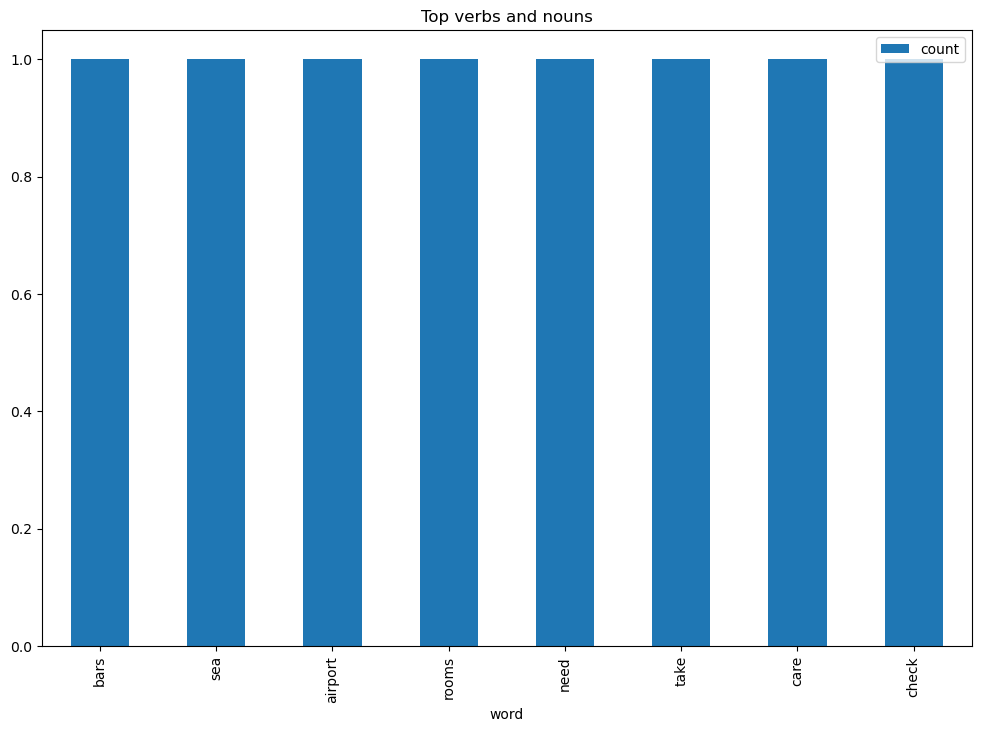

In [57]:
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [58]:
import string
import spacy

In [59]:
from matplotlib.pyplot import imread

In [60]:
affin=pd.read_csv("C:\\Users\\amind\\Downloads\\Afinn.csv",encoding="ISO-8859-1")
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [61]:
data

["The hotel is 5 minutes from the beach and the location is also near the lake.\nThe rooms are a good size and are laid out very well with a good size bathroom\nThe room also has a great sized balcony to take a tea/coffee and \nchill\nThere is a great restaurant inside where the food is good and not to pricey. \nThe staff are super wonderful really friendly all of them the receptionist Maria is so nice she's amazing \nKeep up the great work 👍🏼🙏Great stay",
 'MissingVery Good',
 'Good food in the restaurant downstairs, friendly personnelVery Good',
 'Close to the bars near the sea, close to the airport, clean rooms.Great only they need to take care of the late check in',
 "Excellent staff in this family driven hotel. Very helpful and pleasant people who speak perfect English and couldn't have been better -- all the way from the booking process and online dialog to putting us on a taxi to the airport! This alone is reason enough to come back :-)\nRooms and hotel in general are very clean

In [62]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amind\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences[0:10]

['The hotel is 5 minutes from the beach and the location is also near the lake.',
 'The rooms are a good size and are laid out very well with a good size bathroom\nThe room also has a great sized balcony to take a tea/coffee and \nchill\nThere is a great restaurant inside where the food is good and not to pricey.',
 "The staff are super wonderful really friendly all of them the receptionist Maria is so nice she's amazing \nKeep up the great work 👍🏼🙏Great stay MissingVery Good Good food in the restaurant downstairs, friendly personnelVery Good Close to the bars near the sea, close to the airport, clean rooms.Great only they need to take care of the late check in Excellent staff in this family driven hotel.",
 "Very helpful and pleasant people who speak perfect English and couldn't have been better -- all the way from the booking process and online dialog to putting us on a taxi to the airport!",
 'This alone is reason enough to come back :-)\nRooms and hotel in general are very clean, a

In [64]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,The hotel is 5 minutes from the beach and the ...
1,The rooms are a good size and are laid out ver...
2,The staff are super wonderful really friendly ...
3,Very helpful and pleasant people who speak per...
4,This alone is reason enough to come back :-)\n...
...,...
153,Pleasant breakfast.
154,Quality Eco Hotel.Exceptional\n\n\nExceptional...
155,"That is ""hotel for one night""."
156,Pros:\n1. cleanliness\n2. the beach is within ...


In [65]:
affinity_scores = affin.set_index('word')['value'].to_dict()

In [66]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [67]:
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [68]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [69]:
sent_df 

,sentence,sentiment_value
0,The hotel is 5 minutes from the beach and the ...,0
1,The rooms are a good size and are laid out ver...,15
2,The staff are super wonderful really friendly ...,43
3,Very helpful and pleasant people who speak per...,8
4,This alone is reason enough to come back :-)\n...,3
...,...,...
153,Pleasant breakfast.,3
154,Quality Eco Hotel.Exceptional\n\n\nExceptional...,0
155,"That is ""hotel for one night"".",0
156,Pros:\n1. cleanliness\n2. the beach is within ...,0


In [70]:
sent_df[sent_df.sentiment_value<-2]

,sentence,sentiment_value


In [71]:
sent_df[sent_df.sentiment_value>10]

,sentence,sentiment_value
1,The rooms are a good size and are laid out ver...,15
2,The staff are super wonderful really friendly ...,43
13,"clean, super friendly, convenientsuperb stay, ...",18
17,"Rooms were a great size, very clean, modern an...",14
22,Very friendly and helpful staff.Clean faciliti...,12
42,close to the sandy beaches and night live Very...,14
99,It was great accessibility to where we wanted ...,11
102,Restaurant stayed open reasonably late so I co...,12
108,Thanks to all at the hotel who work hard to ke...,22
110,Good for an overnight stay after a late or ear...,11


In [72]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df.head(10)

,sentence,sentiment_value,word_count
0,The hotel is 5 minutes from the beach and the ...,0,16
1,The rooms are a good size and are laid out ver...,15,46
2,The staff are super wonderful really friendly ...,43,67
3,Very helpful and pleasant people who speak per...,8,34
4,This alone is reason enough to come back :-)\n...,3,27
5,"Plenty of electricity outlets in the room, als...",3,36
6,ever!!,0,1
7,"!Nice, clean, priceworthy and with great staff!",8,7
8,La Veranda has been recently refurbished and t...,2,20
9,Easy walk to Mackenzie Beach and short journey...,1,10


In [73]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
17,"Rooms were a great size, very clean, modern an...",14,25
127,If you are worried about the proximity of the ...,15,47
113,"Everything very clean.Quiet, modern, nice and ...",15,19
1,The rooms are a good size and are laid out ver...,15,46
138,I highly recommend this hotel to anyone who wa...,16,33
13,"clean, super friendly, convenientsuperb stay, ...",18,28
108,Thanks to all at the hotel who work hard to ke...,22,49
124,Wonderful air conditioning that also stays on ...,23,41
120,there is a small café downstairs where you can...,27,53
2,The staff are super wonderful really friendly ...,43,67


In [74]:
sent_df['sentiment_value'].describe()

count    158.000000
mean       4.449367
std        5.842462
min       -1.000000
25%        0.000000
50%        3.000000
75%        6.000000
max       43.000000
Name: sentiment_value, dtype: float64

In [75]:
sent_df['index']=range(0,len(sent_df))
sent_df 

,sentence,sentiment_value,word_count,index
0,The hotel is 5 minutes from the beach and the ...,0,16,0
1,The rooms are a good size and are laid out ver...,15,46,1
2,The staff are super wonderful really friendly ...,43,67,2
3,Very helpful and pleasant people who speak per...,8,34,3
4,This alone is reason enough to come back :-)\n...,3,27,4
...,...,...,...,...
153,Pleasant breakfast.,3,2,153
154,Quality Eco Hotel.Exceptional\n\n\nExceptional...,0,18,154
155,"That is ""hotel for one night"".",0,6,155
156,Pros:\n1. cleanliness\n2. the beach is within ...,0,10,156


In [76]:
sent_df['Sentiment_Class'] = pd.cut(x=sent_df['sentiment_value'],bins=[-8, -1, 0, 17], 
                                    labels=['Negative','Neutral','Positive'], right = True)
sent_df.sample(10)

,sentence,sentiment_value,word_count,index,Sentiment_Class
96,The hotel was airy and light.,0,6,96,Neutral
44,No views but a short walk to nice beach bars.,2,10,44,Positive
71,Always willing to do more to make the guest ha...,0,13,71,Neutral
14,I arrived late at night and it was not a probl...,9,49,14,Positive
84,Very friendly staff.Great option for overnight...,5,11,84,Positive
20,Breakfasts were tasty!,0,3,20,Neutral
111,The shower really good.,3,4,111,Positive
108,Thanks to all at the hotel who work hard to ke...,22,49,108,NaN
43,"Netflix in room an unexpected surprise, but be...",-1,16,43,Negative
114,Comfortable bed.,2,2,114,Positive


In [77]:
sent_df['Sentiment_Class'].value_counts()

Positive    108
Neutral      42
Negative      3
Name: Sentiment_Class, dtype: int64

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

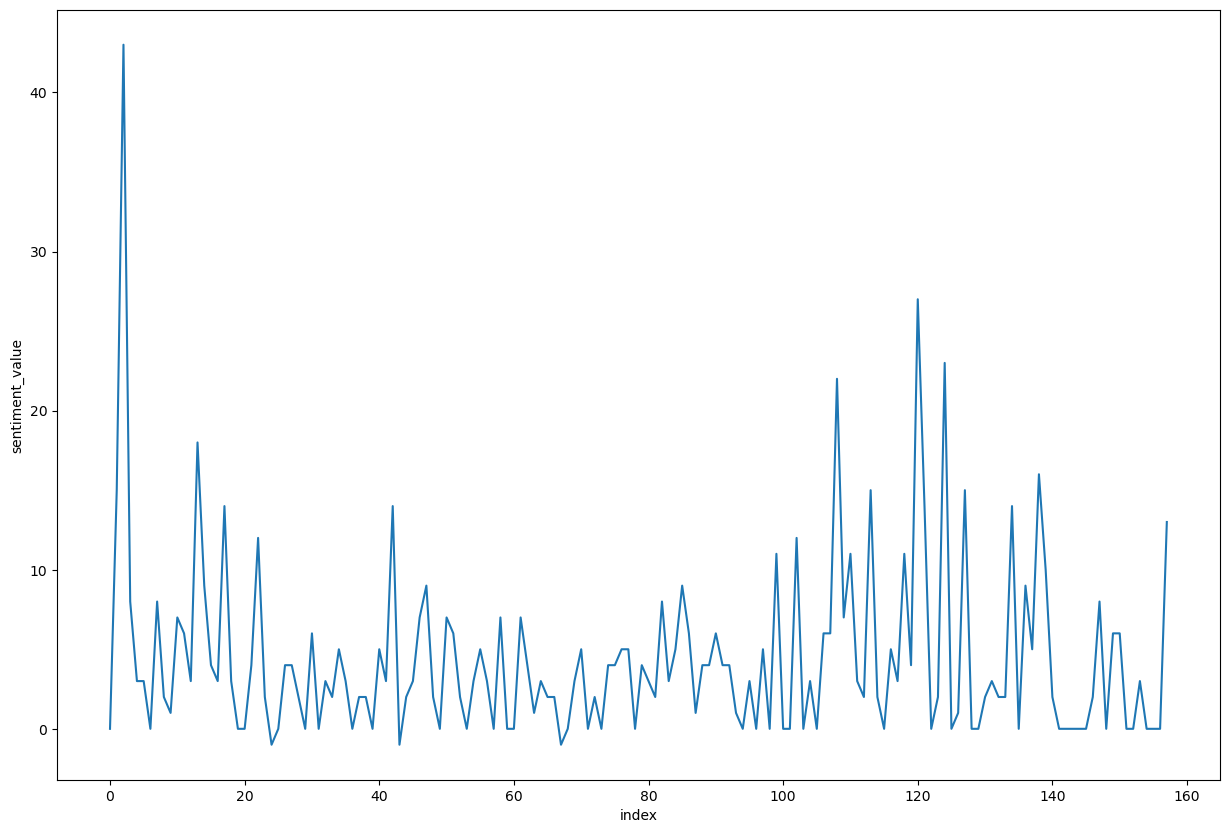

In [78]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

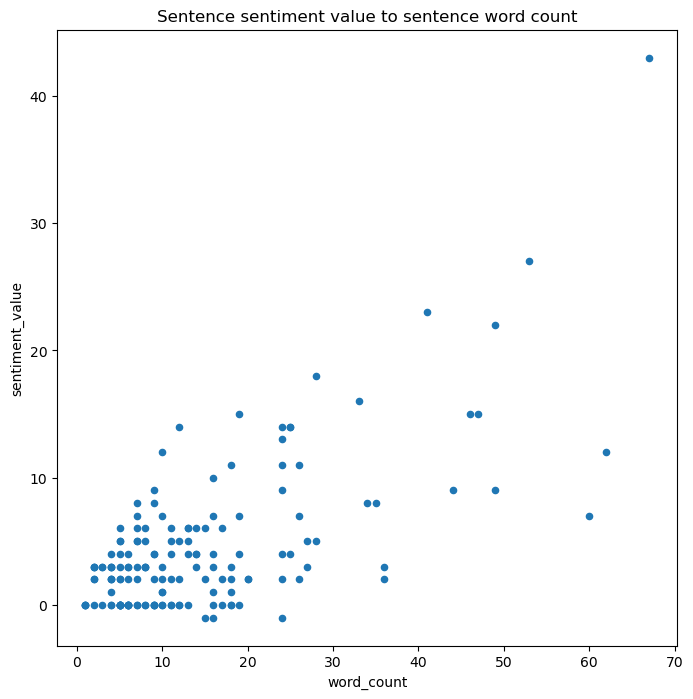

In [79]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

Generate wordcloud

In [80]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [81]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

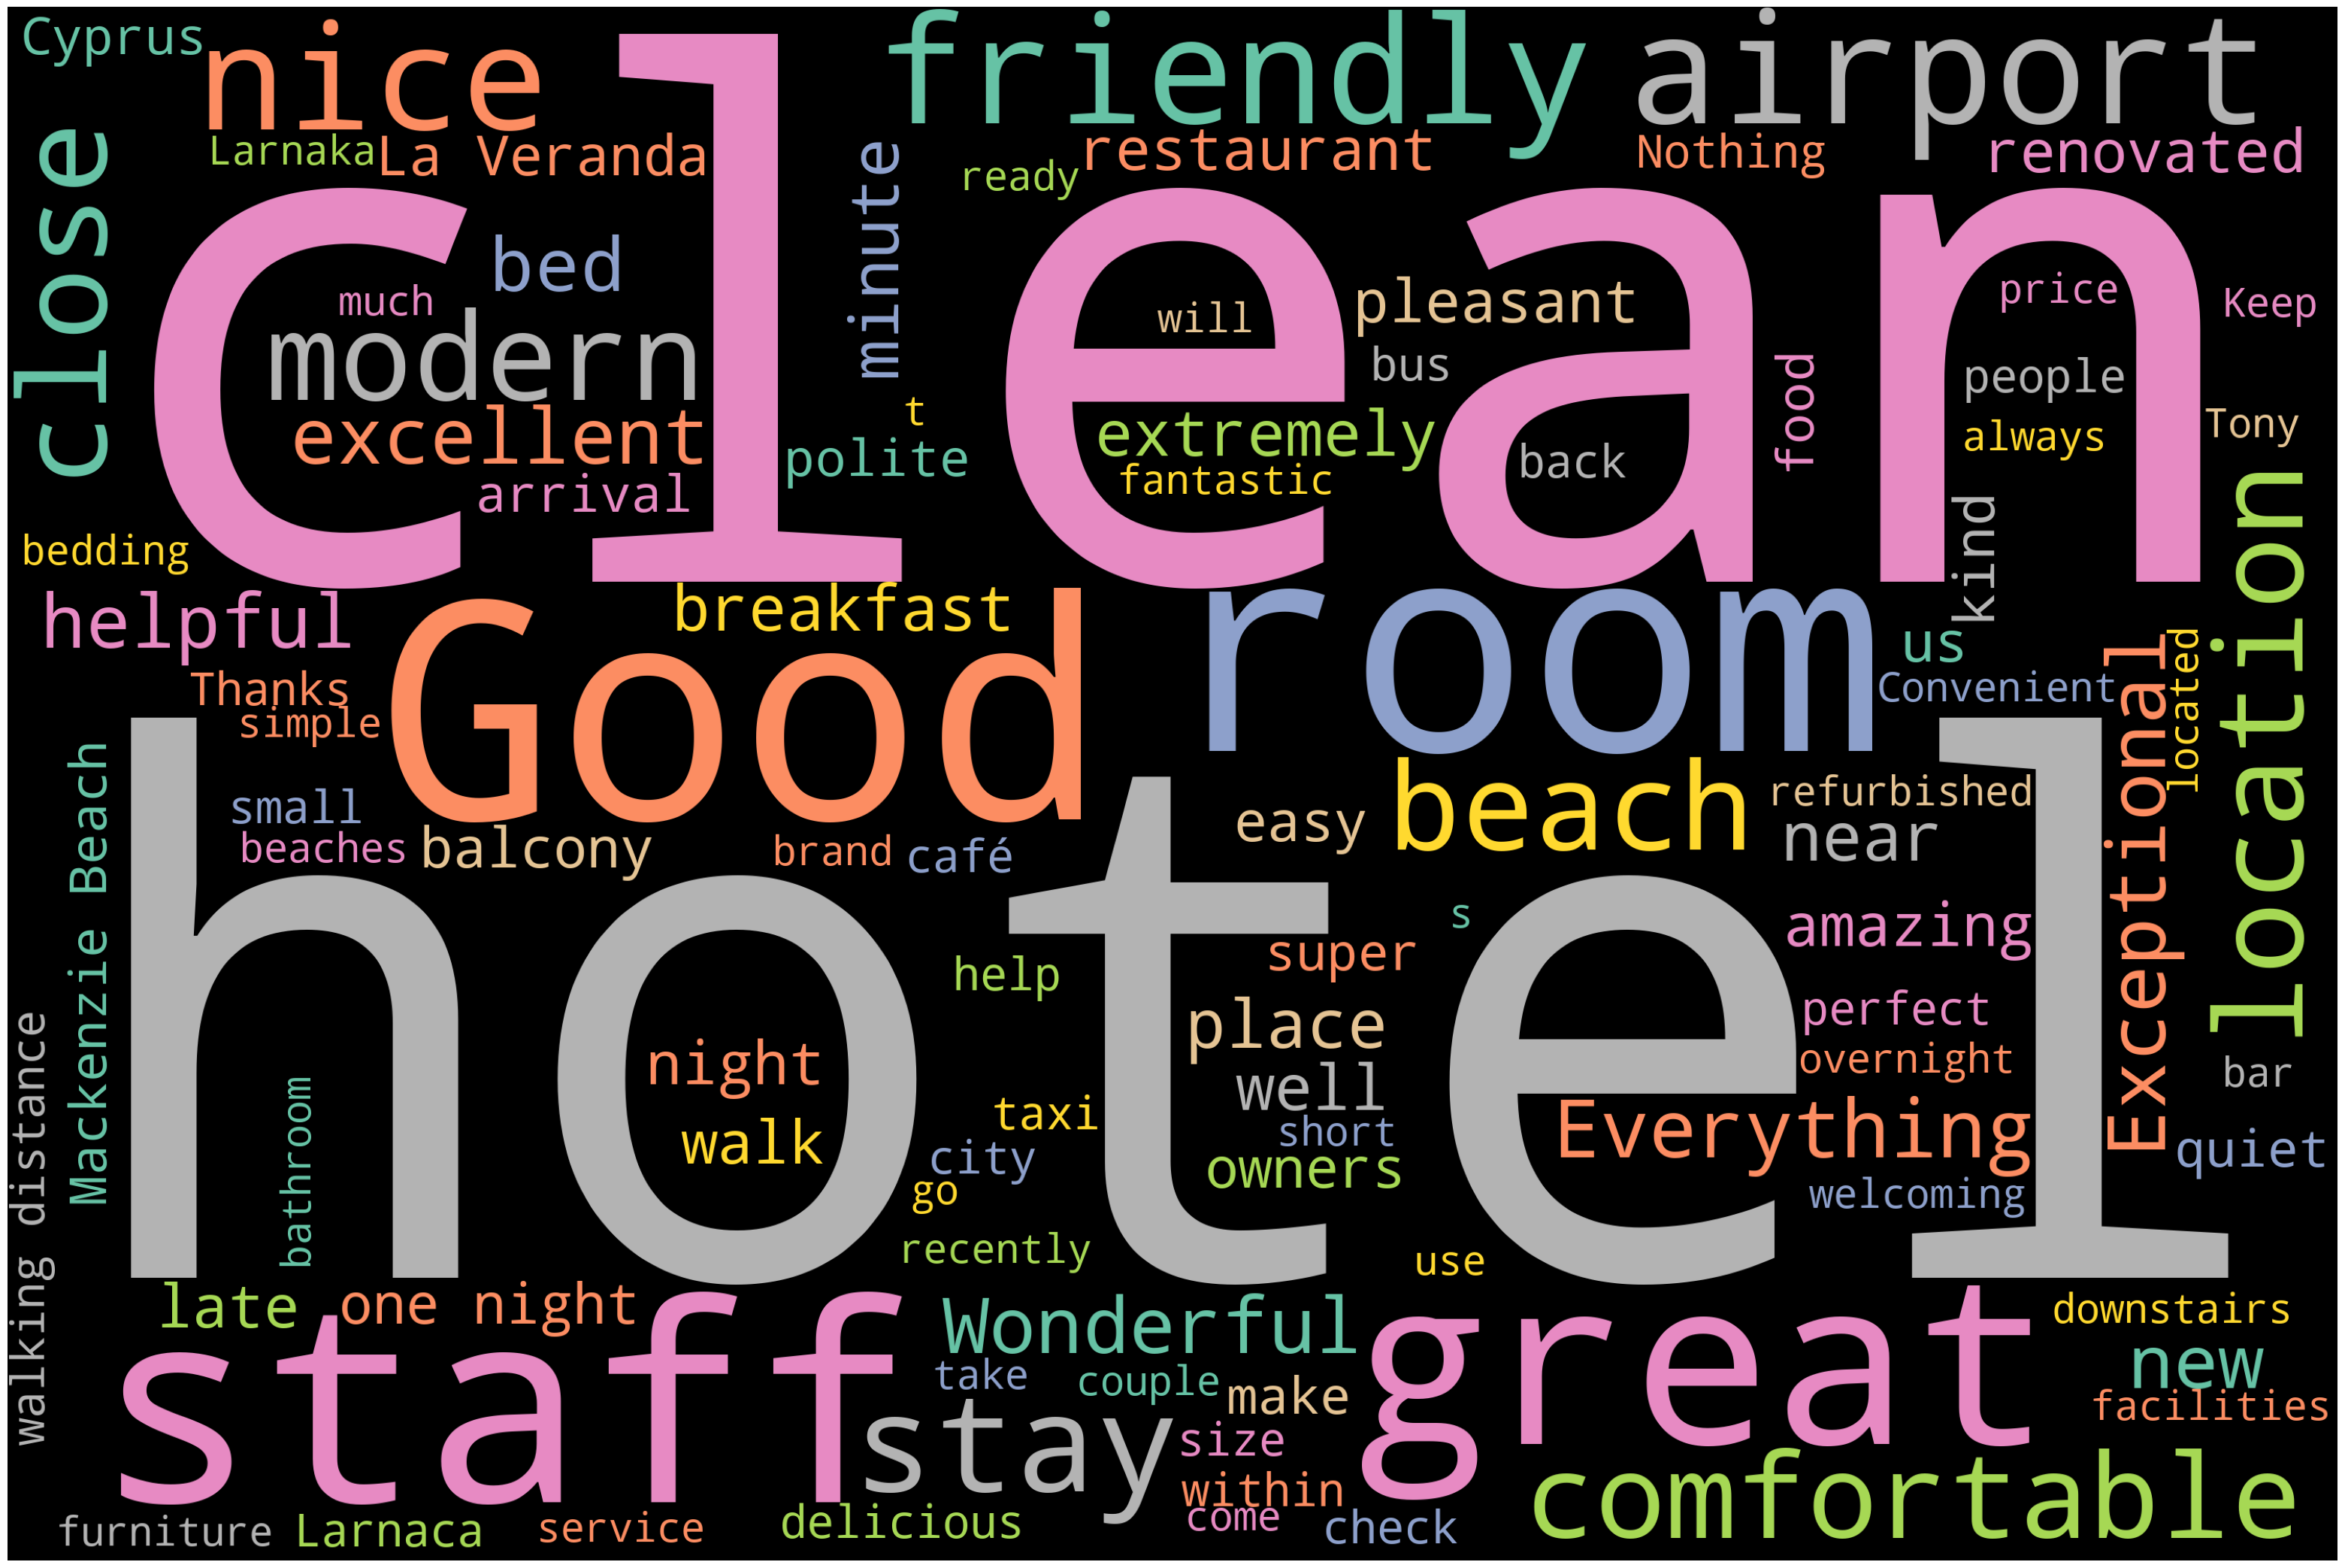

In [82]:
# Generate wordcloud
stopwords = STOPWORDS
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,
                      colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)